<a href="https://colab.research.google.com/github/Marcos-Tonari-Diaz/Desafio_Bain_2022/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bain Stategic Challenge 2022
### Team: "Os Normalizados"


*   Guilerme Ramirez
*   João Segato Kruse
*   Marcos Gabriel Barboza Dure Diaz

https://desafioestrategicobain.com/




# Data Loading

In [3]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
historical_database = pd.read_csv("historical-database.csv", sep=';', parse_dates=['year'], dtype={'city_code':"category", 'product_type':"category", 'product':"category"})

In [50]:
historical_database.head()

,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0
1,1974,746cc42bfb8f6b62,temporary,Others,0.0
2,1974,6cce2bf873870afc,temporary,Others,0.0
3,1974,4de42e351006a2ae,temporary,Others,0.0
4,1974,5b6072f8f6d37acc,temporary,Others,0.0


In [6]:
historical_database['year'] = pd.DatetimeIndex(historical_database['year']).year

In [7]:
historical_database = historical_database.rename(columns = {'destinated_area,':'destinated_area'})

In [8]:
str_list = ['0,', '2,', '3,4', ',']
#add_zero_after_comma = lambda num_str : num_str+'0' if num_str[-1] == ',' else num_str
add_zero_after_comma = lambda num_str : num_str+'0' if num_str[-1] == ',' and len(num_str)!=1 else num_str
str_list = list(map(add_zero_after_comma, str_list))
str_list

['0,0', '2,0', '3,4', ',']

In [9]:
historical_database['destinated_area'] = historical_database['destinated_area'].apply(add_zero_after_comma)
historical_database['destinated_area'] = pd.to_numeric(historical_database['destinated_area'].str.replace(',', '.'), errors='coerce')

In [10]:
historical_database

,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0000
1,1974,746cc42bfb8f6b62,temporary,Others,0.0000
2,1974,6cce2bf873870afc,temporary,Others,0.0000
3,1974,4de42e351006a2ae,temporary,Others,0.0000
4,1974,5b6072f8f6d37acc,temporary,Others,0.0000
...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.5644
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.3960
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.0205
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.2778


In [11]:
historical_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73744 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             73744 non-null  int64   
 1   city_code        73744 non-null  category
 2   product_type     73744 non-null  category
 3   product          73744 non-null  category
 4   destinated_area  34709 non-null  float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 1.4 MB


# Data Analysis

### Dataset Questions


1.   Does the area grow with time? 
2.   How city location affects area?
3.   How product type affects area?
3.   How each product affects area?

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
historical_database.describe(include="all")

,year,city_code,product_type,product,destinated_area
count,73744.000000,73744,73744,73744,3.470900e+04
unique,NaN,144,3,11,NaN
top,NaN,fda49275fbf5caf6,temporary,Others,NaN
freq,NaN,517,43824,12584,NaN
mean,1995.854415,NaN,NaN,NaN,1.443392e+04
std,12.590770,NaN,NaN,NaN,6.221689e+04
min,1974.000000,NaN,NaN,NaN,0.000000e+00
25%,1985.000000,NaN,NaN,NaN,2.800000e+01
50%,1996.000000,NaN,NaN,NaN,3.000000e+02
75%,2007.000000,NaN,NaN,NaN,2.011000e+03


In [14]:
#check for duplicate rows
np.count_nonzero(historical_database.duplicated())

0

In [15]:
pasture_database = historical_database[historical_database["product_type"] == "pasture"]
pasture_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 68992 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             4752 non-null   int64   
 1   city_code        4752 non-null   category
 2   product_type     4752 non-null   category
 3   product          4752 non-null   category
 4   destinated_area  4752 non-null   float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 136.6 KB


### Q1: Does the area grow with time?

In [16]:
historical_database.corr().iloc[0,1]

0.0876941697955521

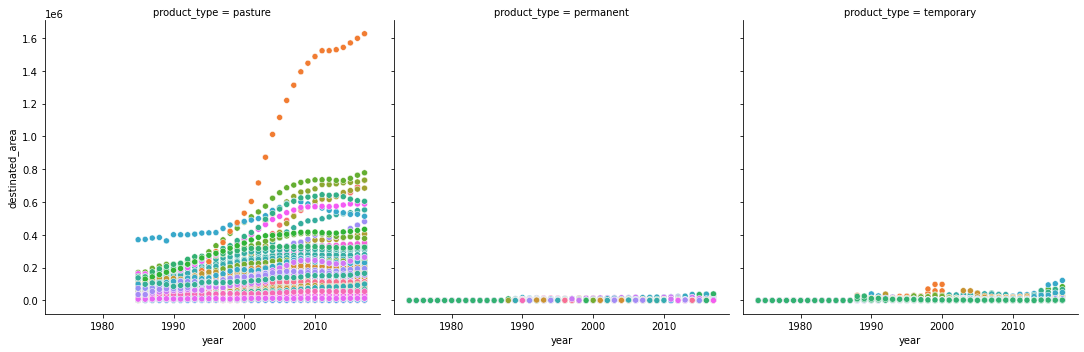

In [17]:
per_producttype_scatterplot = sns.relplot(x="year", y="destinated_area", col="product_type", col_wrap=4, legend=False, data=historical_database, estimator=None, hue="city_code")

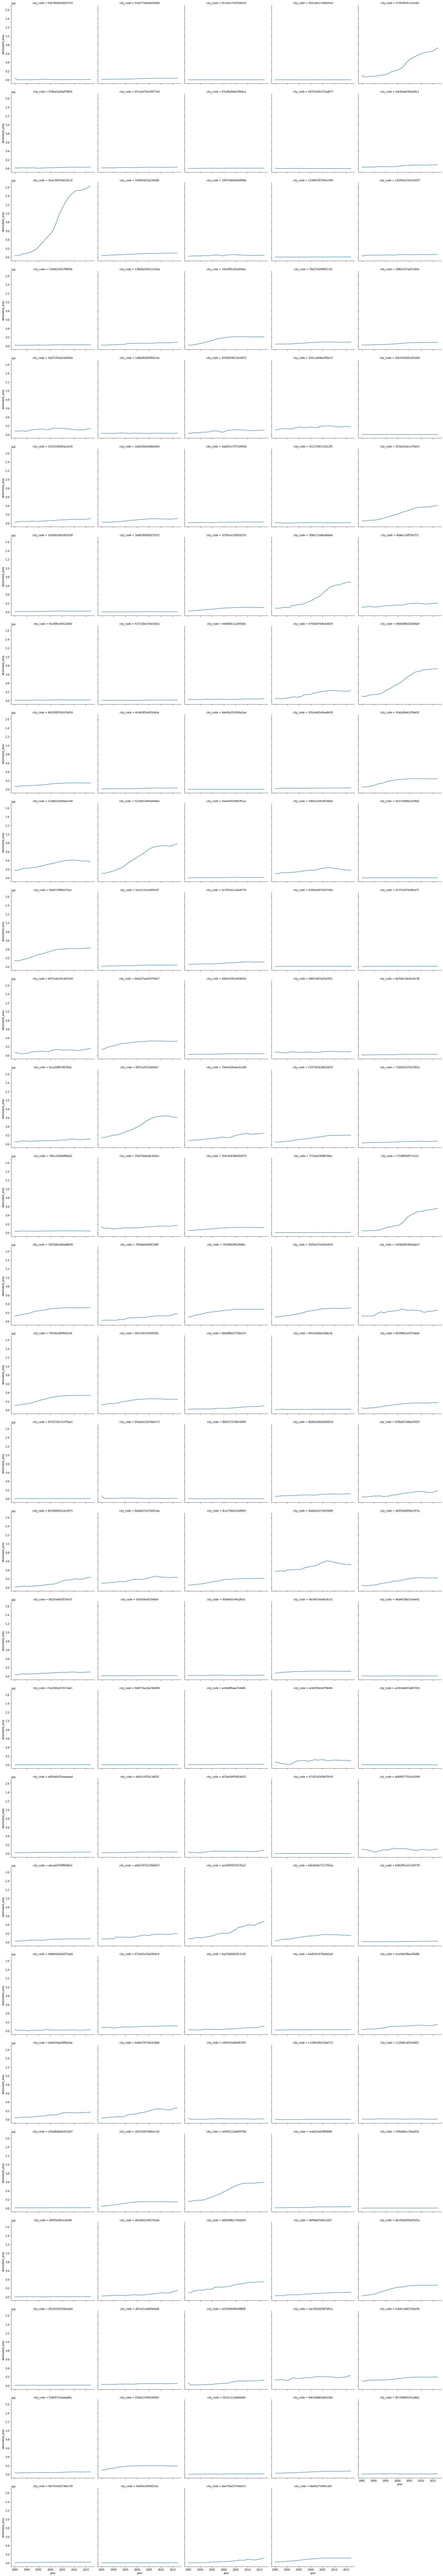

In [18]:
pasture_per_city_scatterplot = sns.relplot(x="year", y="destinated_area", col="city_code",col_wrap=5 ,legend=False, data=pasture_database, estimator=None, kind="line")

### Q2: How city location affects area?

<AxesSubplot:>

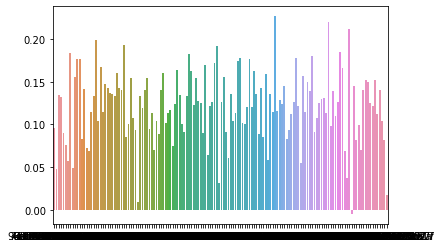

In [19]:
# correlation for each city
year_area_per_city_correlation =  pd.Series(data={city: historical_database[historical_database["city_code"] == city].corr().iloc[0,1] for city in historical_database["city_code"].unique()})
sns.barplot(x=year_area_per_city_correlation.index, y=year_area_per_city_correlation)

### Q3: How Product type affects area?

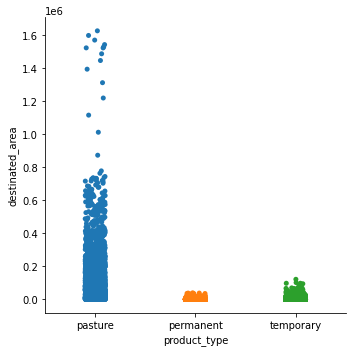

In [20]:
product_type_area_catplot = sns.catplot(x="product_type", y="destinated_area", data=historical_database)

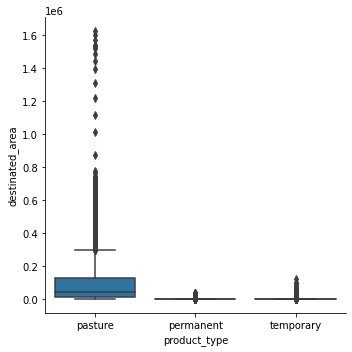

In [21]:
product_type_area_boxplot = sns.catplot(x="product_type", y="destinated_area", data=historical_database, kind="box")

A: The majority of the destinated area is used for pasture, but the medians of the tree product types are not that different. 
Pasture areas have many outliers.

### Q4: How each product affects area?

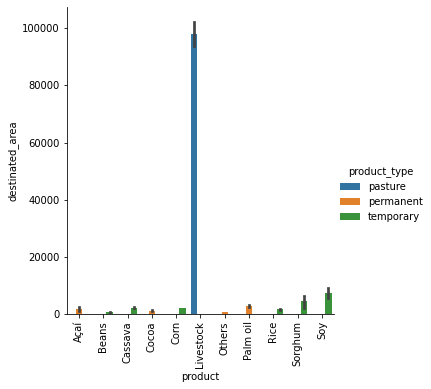

In [22]:
product_type_area_catplot = sns.catplot(x="product", y="destinated_area", data=historical_database, hue="product_type", kind="bar")
product_type_area_catplot.set_xticklabels(rotation=90)

The majority of the used area is destinated to livestock.

# Regression

We will try to use Random Forest Regression

### Data Preparation

In [39]:
historical_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73744 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             73744 non-null  int64   
 1   city_code        73744 non-null  category
 2   product_type     73744 non-null  category
 3   product          73744 non-null  category
 4   destinated_area  34709 non-null  float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 1.4 MB


In [42]:
historical_database_real_areas = historical_database.dropna()
historical_database_real_areas.isnull().values.any()

False

In [49]:
historical_database_one_hot = pd.get_dummies(historical_database_real_areas)
historical_database_one_hot.head()

,year,destinated_area,city_code_0307883b5d063703,city_code_03e477d4ede00e89,city_code_051e9cc7d7636816,city_code_062ce4c17e84291e,city_code_074590cfc1c41ebf,city_code_07bba1a59af78f2d,city_code_07ce2e79e19977e9,city_code_07ed828db19fe8ca,...,product_Beans,product_Cassava,product_Cocoa,product_Corn,product_Livestock,product_Others,product_Palm oil,product_Rice,product_Sorghum,product_Soy
0,1974,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1974,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1974,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1974,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1974,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
features = historical_database_one_hot[[column for column in historical_database_one_hot.columns if column!="destinated_area"]]
target = historical_database_one_hot["destinated_area"]

In [62]:
features_train = features[features["year"] < 2016]
features_test = features[features["year"] >= 2016]
target_train = features[features["year"] < 2016]
target_test = features[features["year"] >= 2016]

### Model Training

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [64]:
from sklearn.metrics import mean_squared_error
predictions = random_forest.predict(features_test)
mean_squared_error(target_test, predictions)

0.016862503178558717

In [ ]:
from sklearn import cross_validation